# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.head()

Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4  5222     1/1/1925                  The Big Parade              $245,000   

  USD_Worldwide_Gross USD_Domestic_Gross  
0         $11,000,000        $10,000,000  
1                  $0                 $0  
2          $8,000,000         $8,000,000  
3          $3,000,000         $3,000,000  
4         $22,000,000        $11,000,000

In [5]:
# No. of rows
data.shape[0]

5391

In [6]:
# No. of columns
data.shape[1]

6

In [7]:
# Check for NaN values
data.isna().sum().sort_values(ascending=False)

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [8]:
# Get the datatypes of the columns
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [9]:
chars_to_remove = ['$', ',']
columns_to_modify = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in columns_to_modify:
    for char in chars_to_remove:
        data[col] = data[col].astype(str).str.replace(char, '')
    data[col] = pd.to_numeric(data[col])

In [10]:
data.head()

Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation                 110000   
1  5140     5/9/1916                     Intolerance                 385907   
2  5230   12/24/1916    20,000 Leagues Under the Sea                 200000   
3  5299    9/17/1920  Over the Hill to the Poorhouse                 100000   
4  5222     1/1/1925                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0             11000000            10000000  
1                    0                   0  
2              8000000             8000000  
3              3000000             3000000  
4             22000000            11000000

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [11]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.sample()

Rank Release_Date              Movie_Title  USD_Production_Budget  \
584   973   1990-12-25  The Godfather: Part III               54000000   

     USD_Worldwide_Gross  USD_Domestic_Gross  
584             66520529            66520529

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [12]:
stats = data.describe()
stats

Rank                   Release_Date  USD_Production_Budget  \
count 5,391.00                           5391               5,391.00   
mean  2,696.00  2003-09-19 15:02:02.203672704          31,113,737.58   
min       1.00            1915-08-02 00:00:00               1,100.00   
25%   1,348.50            1999-12-02 12:00:00           5,000,000.00   
50%   2,696.00            2006-06-23 00:00:00          17,000,000.00   
75%   4,043.50            2011-11-23 00:00:00          40,000,000.00   
max   5,391.00            2020-12-31 00:00:00         425,000,000.00   
std   1,556.39                            NaN          40,523,796.88   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count             5,391.00            5,391.00  
mean         88,855,421.96       41,235,519.44  
min                   0.00                0.00  
25%           3,865,206.00        1,330,901.50  
50%          27,450,453.00       17,192,205.00  
75%          96,454,455.00       52,343,687.00  
max       2,783,918,982.00      936,662,225.00  
std         168,457,757.00       66,029,346.27

In [13]:
# Average production budget
stats.loc['mean', 'USD_Production_Budget']

np.float64(31113737.57837136)

In [14]:
# Average worldwide gross revenue
stats.loc['mean', 'USD_Worldwide_Gross']

np.float64(88855421.96271564)

In [15]:
# Minimum worldwide revenue
stats.loc['min', 'USD_Worldwide_Gross']

np.float64(0.0)

In [16]:
# Minimum domestic revenue
stats.loc['min', 'USD_Domestic_Gross']

np.float64(0.0)

In [17]:
# Are the bottom 25% of films actually profitable or do they lose money?
if stats.loc['25%', 'USD_Domestic_Gross'] - stats.loc['25%', 'USD_Production_Budget'] > 0:
    print('Profitable in domestic gross')
else:
    print('Loss making in domestic gross')

Loss making in domestic gross


In [18]:
if stats.loc['25%', 'USD_Worldwide_Gross'] - stats.loc['25%', 'USD_Production_Budget'] > 0:
    print('Profitable in worldwide gross')
else:
    print('Loss making in worldwide gross')

Loss making in worldwide gross


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [19]:
data[data['USD_Domestic_Gross'] == 0].count()

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [20]:
data[data['USD_Worldwide_Gross'] == 0].count()

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64

### Filtering on Multiple Conditions

In [21]:
international_releases = data.loc[(data['USD_Domestic_Gross']) == 0 & (data['USD_Worldwide_Gross'] != 0)]
international_releases

Rank Release_Date                       Movie_Title  \
1     5140   1916-05-09                       Intolerance   
6     4630   1927-12-08                             Wings   
8     4240   1930-01-01                     Hell's Angels   
17    4814   1936-10-20  Charge of the Light Brigade, The   
27    4789   1941-10-28           How Green Was My Valley   
...    ...          ...                               ...   
5386  2950   2018-10-08                               Meg   
5387   126   2018-12-18                           Aquaman   
5388    96   2020-12-31                       Singularity   
5389  1119   2020-12-31            Hannibal the Conqueror   
5390  2517   2020-12-31    Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
1                    385907                    0                   0  
6                   2000000                    0                   0  
8                   4000000                    0                   0  
17                  1200000                    0                   0  
27                  1250000                    0                   0  
...                     ...                  ...                 ...  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390               20000000                    0                   0  

[512 rows x 6 columns]

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [22]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases.tail()

Rank Release_Date           Movie_Title  USD_Production_Budget  \
5340  1506   2017-04-14   Queen of the Desert               36000000   
5348  2225   2017-05-05     Chāi dàn zhuānjiā               23000000   
5360  4832   2017-07-03             Departure                1100000   
5372  1856   2017-08-25             Ballerina               30000000   
5374  4237   2017-08-25  Polina danser sa vie                4000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
5340              1480089                   0  
5348             58807172                   0  
5360                27561                   0  
5372             48048527                   0  
5374                36630                   0

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [23]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [24]:
future_releases = data[data['Release_Date'] >= scrape_date]
future_releases

Rank Release_Date                     Movie_Title  \
5384   321   2018-09-03               A Wrinkle in Time   
5385   366   2018-10-08                  Amusement Park   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390               20000000                    0                   0

In [25]:
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [26]:
lost_money = data_clean.loc[data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']]
print(f'{round((len(lost_money)/len(data_clean)) * 100, 2)}%')

37.28%


# Seaborn for Data Viz: Bubble Charts

In [27]:
plt.figure(figsize=(14, 8), dpi=1000)

# set styling on a single chart
with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(
        data=data_clean,
        x='USD_Domestic_Gross', 
        y='USD_Worldwide_Gross',
        hue='USD_Worldwide_Gross',
        size='USD_Worldwide_Gross'
    )
    
    ax.set(
        xlim=(0, 4.5 * (10**8)),
        ylim=(0, 3 * (10**9)),
        xlabel='Budget in $100 million',
        ylabel='Revenue in $ billions'
    )

plt.show();

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



In [28]:
data_clean.sample()

Rank Release_Date         Movie_Title  USD_Production_Budget  \
1625  2060   2001-06-07  Kiss of the Dragon               25000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
1625             36833473            36833473

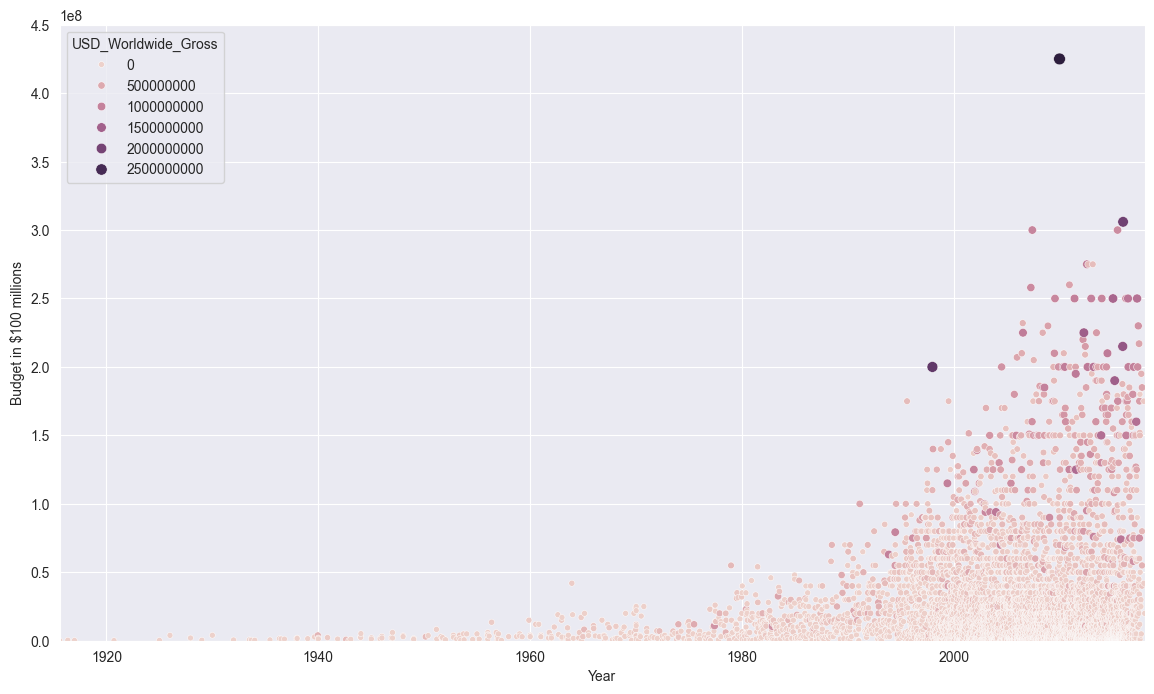

In [29]:
plt.figure(figsize=(14, 8), dpi=100)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(
        data=data_clean,
        x='Release_Date',
        y='USD_Production_Budget',
        hue='USD_Worldwide_Gross',
        size='USD_Worldwide_Gross'
    )

    ax.set(
        xlim=(data_clean['Release_Date'].min(), data_clean['Release_Date'].max()),
        ylim=(0, 4.5 * (10**8)),
        xlabel='Year', 
        ylabel='Budget in $100 millions'
    )

plt.show();

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [30]:
data_clean['Decade'] = pd.DatetimeIndex(data_clean['Release_Date']).year // 10 * 10

In [31]:
data_clean.head()

Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
0             11000000            10000000    1910  
1                    0                   0    1910  
2              8000000             8000000    1910  
3              3000000             3000000    1920  
4             22000000            11000000    1920

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [32]:
old_films = data_clean[data_clean['Decade'] <= 1960]
new_films = data_clean[data_clean['Decade'] > 1960]

In [33]:
len(new_films)

5231

In [34]:
len(new_films)

5231

In [35]:
most_expensive_film_made_prior_to_1970_row_num = old_films['USD_Production_Budget'].idxmax()
old_films.loc[most_expensive_film_made_prior_to_1970_row_num]['Movie_Title']

'Cleopatra'

# Seaborn Regression Plots

In [36]:
plt.figure(figsize=(14, 8), dpi=1000)

with sns.axes_style('darkgrid'):
    sns.regplot(
        data=old_films,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        scatter_kws={'alpha': 0.4},
        line_kws={'color': 'black'}
    )

plt.show();

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

In [37]:
plt.figure(figsize=(14, 8), dpi=1000)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(
        data=new_films,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        color='#2f4b7c',
        scatter_kws={'alpha': 0.3},
        line_kws={'color': '#ff7c43'}
    )
    ax.set(
        xlabel='Budget in $100 millions',
        ylabel='Revenue in $ billions',
        xlim=(0, 4 * (10**8)),
        ylim=(0, 3 * (10**9))
    )

plt.show();

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [38]:
lin_reg = LinearRegression()

# Feature
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Target 
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best fit
lin_reg.fit(X, y)

LinearRegression()

In [39]:
# Theta-1
print(f"If the movie's budget is $0, the estimated revenue is ${round(lin_reg.intercept_[0]/10**6, 2)} millions")

If the movie's budget is $0, the estimated revenue is $-8.65 millions


In [40]:
# Theta-2
print(f"For every budget increase of $1, the revenue increase is ${round(lin_reg.coef_[0][0], 2)}")

For every budget increase of $1, the revenue increase is $3.12


In [41]:
# Get the R-Squared (how well the model fits the data)
lin_reg.score(X, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [42]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [43]:
lin_reg.fit(X, y)

LinearRegression()

In [44]:
print(f"If the movie's budget is $0, the estimated revenue is ${round(lin_reg.intercept_[0]/10**6, 2)} millions")
print(f"For every budget increase of $1, the revenue increase is ${round(lin_reg.coef_[0][0], 2)}")

If the movie's budget is $0, the estimated revenue is $22.82 millions
For every budget increase of $1, the revenue increase is $1.65


In [45]:
lin_reg.score(X, y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [46]:
budget = 350 * (10**6)
revenue = lin_reg.intercept_[0] + (lin_reg.coef_[0][0] * budget)

In [47]:
print(f"Estimated revenue of a film with production budget of $350 millions: ${round(revenue/10**6, 2)} millions")

Estimated revenue of a film with production budget of $350 millions: $599.52 millions
